# This code implement 2 agents playing the iterated prisoner's dilemma.

## Here agents play in a fully decentralized setting

0 encodes defect
1 encodes cooperate

In [18]:
import numpy as np
from sklearn.utils import check_random_state
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from utils_plot import configure_plt
rng = check_random_state(6)

In [19]:
# Create the reward structure
g = 1.8  # Incentive to cooperate
# As done in Artificial Intelligence and Spontaneous Collusion 2023
# Create the reward
rewards = np.zeros((2, 2))
rewards[0, 0] = 2
rewards[1, 0] = g
rewards[0, 1] = 2 + g
rewards[1, 1] = 2 * g

In [20]:
# Select discount factor and step size 
gamma = 0.6  # Discount factor
# alpha = 1
alpha = .001  # Step size

In [21]:
# Initialization of the Q-values
# bad_init = True
bad_init = False
Q0 = np.zeros((2, 2, 2))
# Initialize Q at the always defect policy
for i in range(2):
    for j in range(2):
        Q0[i, j, 0] = (rewards[0, 0] + rewards[0, 1]) / (2 * (1 - gamma))
        Q0[i, j, 1] = (rewards[1, 0] + rewards[1, 1]) / 2
        Q0[i, j, 1] += gamma / (1 - gamma) * (rewards[0, 0] + rewards[0, 1]) / 2
        # Q0[i, j, 1] += rewards[1, 0]
if bad_init:
    Q0 /= 2
# Check that this is indeed an always defect policy
np.testing.assert_array_less(Q0[:, :, 1], Q0[:, :, 0])


## Epsilon-greedy $Q$-learning 101

For a given state $(a_1, a_2)$, chose the next action.

The chosen action is $\text{argmax}_a Q[a_1, a_2, a]$ with probability $1 - \epsilon$.

A random action, with probability $\epsilon$.

In [22]:
# Espsilon greedy Q-learning
def get_next_action(Q, a1, a2, epsilon):
    best_action = Q[a1, a2].argmax()
    if rng.rand(1) > epsilon:
        next_action = best_action
    else:
        next_action = 1 - best_action
    return next_action


In [23]:
max_iter = 10_000
list_epsilon = [0., 0.001, 0.01, 0.05]

n_curves = 1
# n_curves = 10

dict_res = {}


In [24]:
for epsilon in list_epsilon:
    list_diff_Q_final1 = []
    for idx_curve in range(n_curves):
        # init states and Q function
        Q1 = Q0.copy()
        Q2 = Q0.copy()
        # Q2 = Q0.copy() + shift_Q1_Q2
        # p_s = p_s0.copy()
        list_diff_Q1 = []
        list_diff_Q2 = []
        # s0 = np.zeros((1, 1))
        a1 = 0
        a2 = 0
        # 1 / 0
        for t in range(max_iter):
            next_action1 = get_next_action(Q1, a1, a2, epsilon)
            next_action2 = get_next_action(Q2, a2, a1, epsilon)
            # print("Next action players (%i, %i)" % (next_action1, next_action2))
            
            Q1[a1, a2, next_action1] += alpha * (
                rewards[next_action1, next_action2] + gamma * Q1[next_action1,
                next_action2].max() - Q1[a1, a2, next_action1])


            Q2[a2, a1, next_action2] += alpha * (
                rewards[next_action2, next_action1] + gamma * Q2[next_action2, next_action1].max() - Q2[
                    a2, a1, next_action2])

            a1 = next_action1
            a2 = next_action2

            diff_Q1 = Q1[:, :, 1] - Q1[:, :, 0]
            diff_Q1 = Q2[:, :, 1] - Q2[:, :, 0]
            list_diff_Q1.append(diff_Q1)

        list_diff_Q1 = np.array(list_diff_Q1)
        list_diff_Q_final1.append(list_diff_Q1.copy())
    list_diff_Q_final1 = np.array(list_diff_Q_final1)

    dict_res[epsilon, 1] = list_diff_Q_final1.copy()


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_7254/1215757137.py:10: SyntaxWarning: invalid escape sequence '\m'
  dict_label[0, 0] = "$s= (\mathrm{D}, \mathrm{D})$"
/tmp/ipykernel_7254/1215757137.py:11: SyntaxWarning: invalid escape sequence '\m'
  dict_label[1, 1] = "$s= (\mathrm{C}, \mathrm{C})$"
/tmp/ipykernel_7254/1215757137.py:12: SyntaxWarning: invalid escape sequence '\m'
  dict_label[0, 1] = "$s= (\mathrm{D}, \mathrm{C})$"
/tmp/ipykernel_7254/1215757137.py:13: SyntaxWarning: invalid escape sequence '\m'
  d

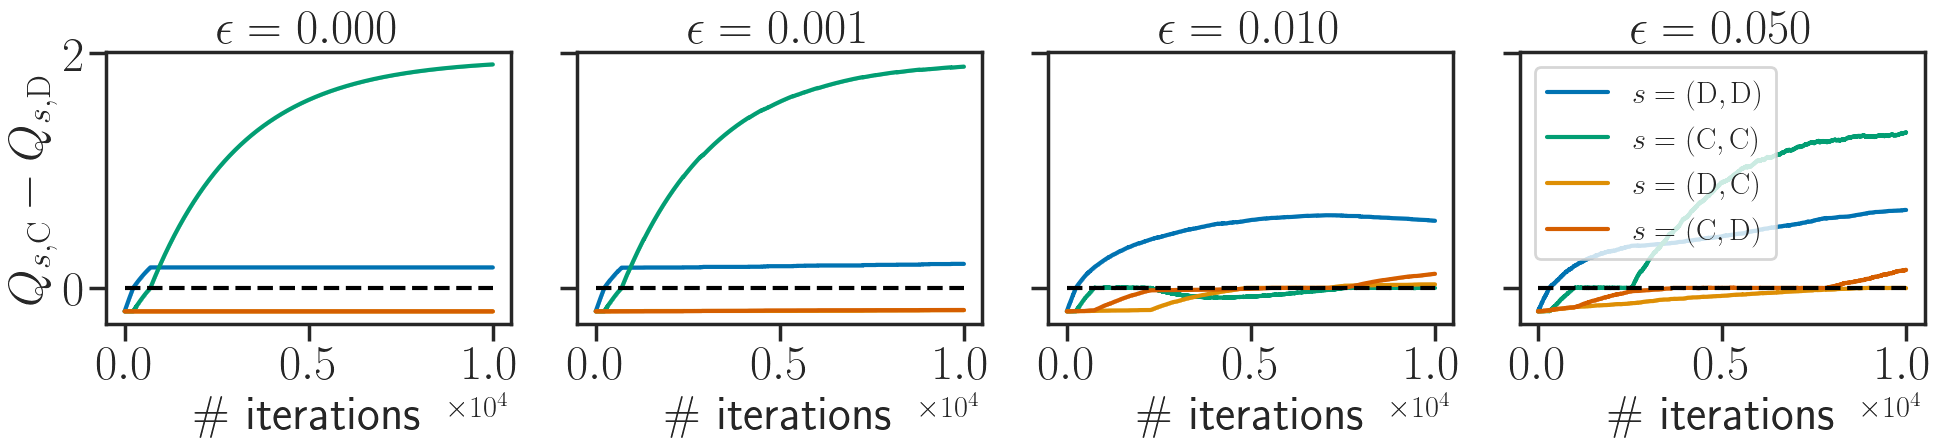

In [25]:

palette = sns.color_palette('colorblind')
# from sns import
dict_color = {}
dict_color[0, 0] = palette[0]
dict_color[1, 1] = palette[2]
dict_color[0, 1] = palette[1]
dict_color[1, 0] = palette[3]

dict_label = {}
dict_label[0, 0] = "$s= (\mathrm{D}, \mathrm{D})$"
dict_label[1, 1] = "$s= (\mathrm{C}, \mathrm{C})$"
dict_label[0, 1] = "$s= (\mathrm{D}, \mathrm{C})$"
dict_label[1, 0] = "$s= (\mathrm{C}, \mathrm{D})$"

plt.close('all')
configure_plt()
figsize = (20, 5)
fontsize = 35
fig, ax = plt.subplots(
    1, len(list_epsilon), figsize=figsize, sharey=True, sharex=True)
# plot main curves
x = np.arange(max_iter)
for idx_epsilon, epsilon in enumerate(list_epsilon):

    for (a1, a2) in [[0, 0], [1, 1], [0, 1], [1, 0]]:
        color = dict_color[a1, a2]
        label = dict_label[a1, a2]
        mean_ = dict_res[epsilon, 1][:, :, a1, a2].mean(axis=0)
        std_ = dict_res[epsilon, 1][:, :, a1, a2].std(axis=0)
        ax[idx_epsilon].plot(
            x, mean_, label=label, color=color)
        ax[idx_epsilon].fill_between(
            x, (mean_ - 1.96 * std_), (mean_ + 1.96 * std_),
            color=color, alpha=.3)

    ax[idx_epsilon].set_xticks([0, max_iter // 2, max_iter])
    ax[idx_epsilon].hlines(0, 0, max_iter, colors="black", linestyles="--")
    ax[idx_epsilon].set_title("$\epsilon = %.3f$" % epsilon, fontsize=fontsize)
    ax[idx_epsilon].tick_params(axis='x', labelsize=fontsize)
    ax[idx_epsilon].tick_params(axis='y', labelsize=fontsize)
    ax[idx_epsilon].set_xlabel(r"\# iterations", fontsize=fontsize)
ax[idx_epsilon].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
#     epsilon, g, alpha)
ax[0].set_ylabel(r"$Q_{s, \mathrm{C}} - Q_{s, \mathrm{D}}$", fontsize=fontsize)

plt.tight_layout()


# if save_fig:
#     fig.savefig(dir_name + figname + ".pdf", bbox_inches="tight")
#     fig.savefig(dir_name + figname + ".svg", bbox_inches="tight")
#     _plot_legend_apart(ax[0], dir_name + figname + "_legend.pdf", ncol=3)
plt.legend()
plt.show(block=False)
